In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd

In [8]:
#create data for test 
n_train = 500
n_test = 100
n_features = 10
noise = 1

X, y, coef = make_regression(n_samples=n_train + n_test, n_features=n_features, noise=noise, coef=True)


In [2]:
data = pd.read_csv('Data_example1.csv')
x = (data['x'].values).reshape(-1,1)
y = (data['y'].values).reshape(-1,1)

n=3
#create X matrix for a given order n
X = np.zeros((len(x), n+1))
for i in range(n+1):
    X[:,[i]] = x**i


#split into training and testing -- 15% of the data for testing
n_test = int(len(x)*.15)
n_train= len(x)-n_test
random_seed = 32
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n_train, test_size=n_test, random_state=random_seed)


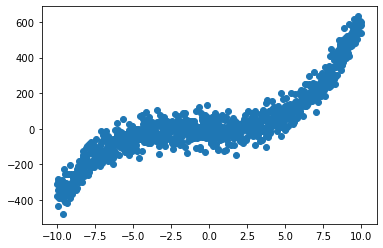

In [13]:
plt.plot(x,y,'o')

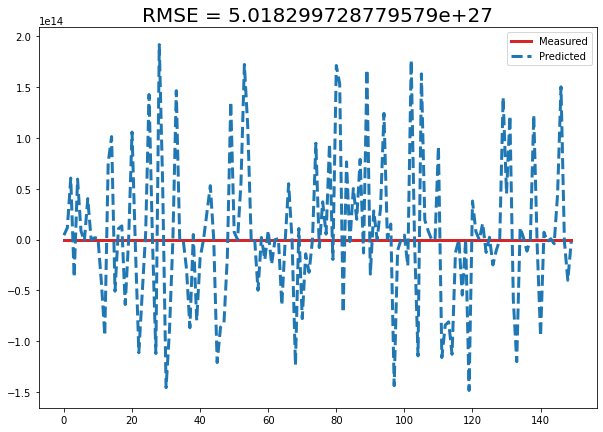

In [6]:
#Using Scikit-learn (sklearn) to apply gradient Descent

#create an instance of the class SGDRegressor()
reg = SGDRegressor() 

#fit the model with data
reg.fit(X_train,y_train.ravel());

#make a prediction 
y_pred = reg.predict(X_test)

#plot the result
fig,ax = plt.subplots(1,1,figsize=(10,7))
plt.plot(y_test, label= 'Measured', lw = 3, color='tab:red');
plt.plot(y_pred, '--', label= 'Predicted', lw = 3, color = 'tab:blue')
plt.legend()
plt.title(f'RMSE = {mean_squared_error(y_pred, y_test)}', fontsize=20);
plt.show();

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_train_normalized[:,[0]] = np.ones(len(X_train_normalized)).reshape(-1,1)
print(X_train_normalized)

[[ 1.00000000e+00  7.01012771e-01 -5.60800952e-01  1.71160838e-01]
 [ 1.00000000e+00 -9.31406272e-01 -1.50614774e-01 -4.08880882e-01]
 [ 1.00000000e+00  1.20329555e+00  5.01314263e-01  8.78562521e-01]
 ...
 [ 1.00000000e+00  1.39862775e+00  1.06538094e+00  1.38096586e+00]
 [ 1.00000000e+00  1.91753839e-01 -1.06675117e+00 -2.36229414e-04]
 [ 1.00000000e+00  7.91702718e-01 -4.10399353e-01  2.48043748e-01]]


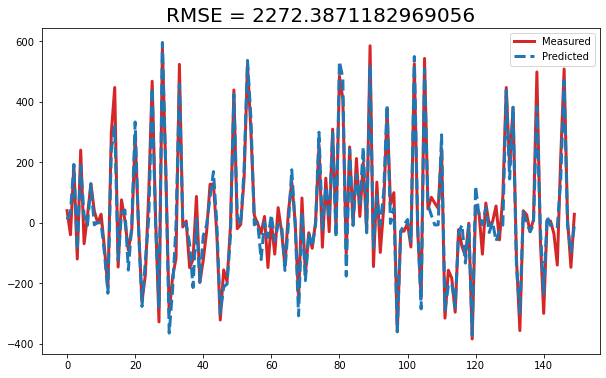

In [12]:
#Using Scikit-learn (sklearn) to apply gradient Descent


#create pipeline that includes scaling and gradient descent

scaler = StandardScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_train_normalized[:,[0]] = np.ones(len(X_train_normalized)).reshape(-1,1)


X_test_normalized = scaler.transform(X_test)
X_test_normalized[:,[0]] = np.ones(len(X_test_normalized)).reshape(-1,1)


reg = SGDRegressor()

#fit the model with data
reg.fit(X_train_normalized,y_train.ravel());

#make a prediction 
y_pred = reg.predict(X_test_normalized)

#plot the result
fig,ax = plt.subplots(1,1,figsize=(10,6))
plt.plot(y_test, label= 'Measured', lw = 3, color='tab:red');
plt.plot(y_pred, '--', label= 'Predicted', lw = 3, color = 'tab:blue')
plt.legend()
plt.title(f'RMSE = {mean_squared_error(y_pred, y_test)}', fontsize=20);
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


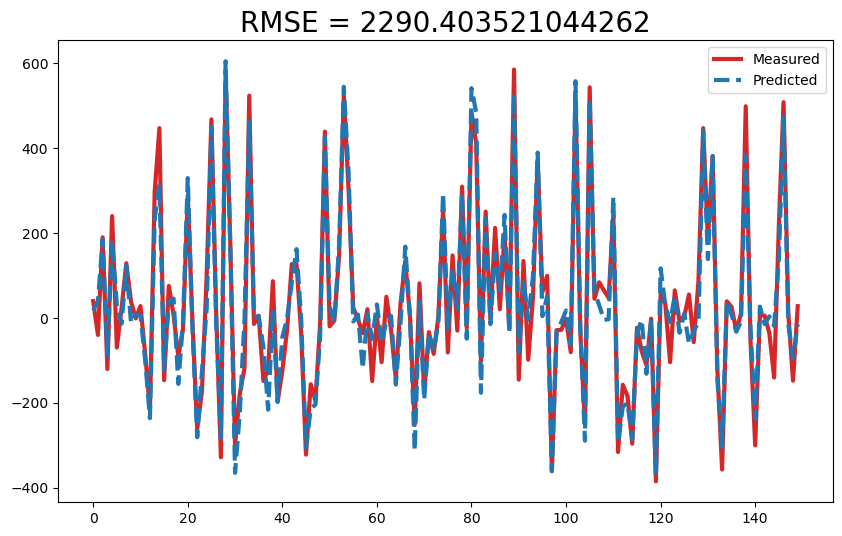

In [47]:
data = pd.read_csv('Data_example1.csv')
x = (data['x'].values).reshape(-1,1)
y = (data['y'].values).reshape(-1,1)

n=10
#create X matrix for a given order n
X = np.zeros((len(x), n+1))
for i in range(n+1):
    X[:,[i]] = x**i


#split into training and testing -- 15% of the data for testing
n_test = int(len(x)*.15)
n_train= len(x)-n_test
random_seed = 32
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n_train, test_size=n_test, random_state=random_seed)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

reg = SGDRegressor()

#fit the model with data
reg.fit(X_train_normalized,y_train);

#make a prediction 
y_pred = reg.predict(X_test_normalized)


#plot the result
fig,ax = plt.subplots(1,1,figsize=(10,6))
plt.plot(y_test, label= 'Measured', lw = 3, color='tab:red');
plt.plot(y_pred, '--', label= 'Predicted', lw = 3, color = 'tab:blue')
plt.legend()
plt.title(f'RMSE = {mean_squared_error(y_pred, y_test)}', fontsize=20);
plt.show();

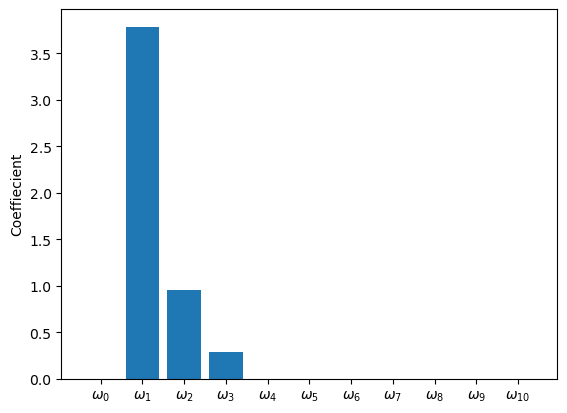

In [70]:
#coeficients importance

#de normalize the coeficients
coefficients = np.true_divide(reg.coef_,  scaler.scale_) 
plt.bar(range(len(coefficients)),coefficients)
plt.xticks(range(len(coefficients)), ['$\omega_{0}$','$\omega_{1}$','$\omega_{2}$','$\omega_{3}$','$\omega_{4}$','$\omega_{5}$','$\omega_{6}$','$\omega_{7}$','$\omega_{8}$','$\omega_{9}$','$\omega_{10}$'])
plt.ylabel('Coeffiecient')
plt.show();

### Example
Predicting house market value based on certain characteristics 

<div style="text-align:center">
<img src="boston.jpg" alt="plot" width="400" />
</div>

<div style="text-align:center">
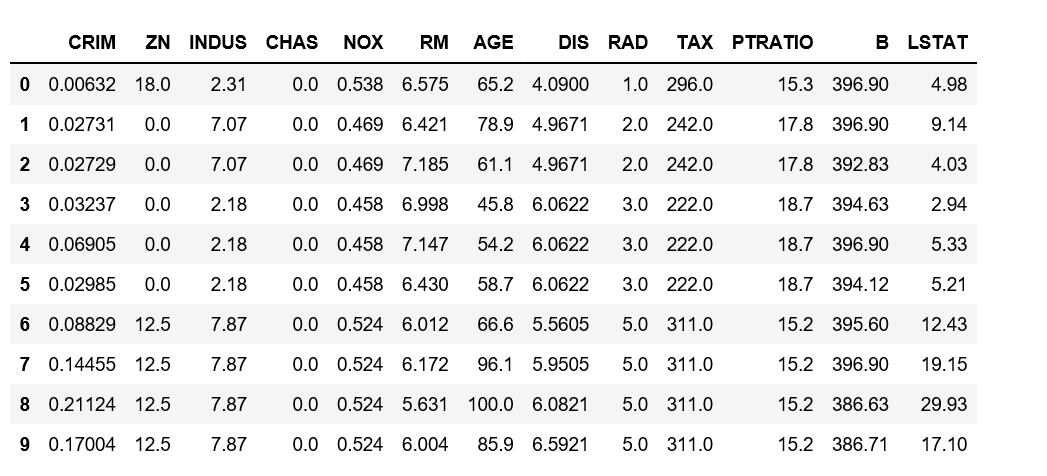
</div>


In [34]:
#example: predicting house prices 
import sklearn.datasets as datasets

data = datasets.load_boston()
X, y = data.data, data.target

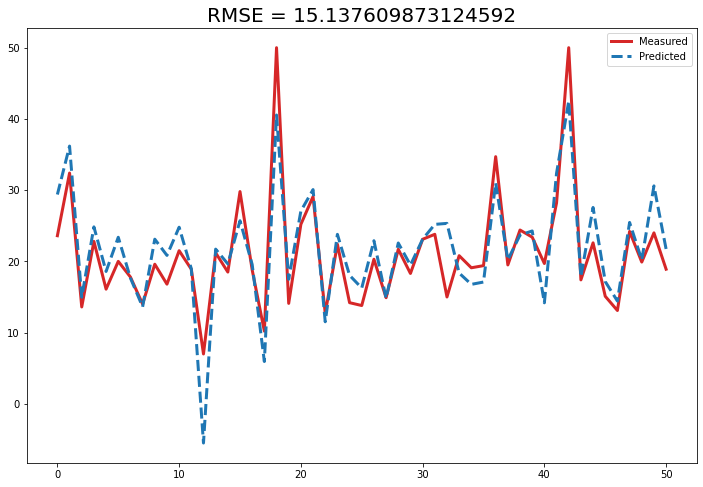

In [35]:
#split into training and testing 
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=random_seed)


#create pipeline that includes scaling and gradient descent
reg = Pipeline([('scaler', StandardScaler()),
                ('SGD', SGDRegressor(eta0=0.01))])
#fit the model with data
reg.fit(X_train,y_train.ravel());

#make a prediction 
y_pred = reg.predict(X_test)

#plot the result
fig,ax = plt.subplots(1,1,figsize=(12,8))
plt.plot(y_test, label= 'Measured', lw = 3, color='tab:red');
plt.plot(y_pred, '--', label= 'Predicted', lw = 3, color = 'tab:blue')
plt.legend()
plt.title(f'RMSE = {mean_squared_error(y_pred,y_test)}', fontsize=20);
plt.show();

Text(0.5, 0, 'predicted')

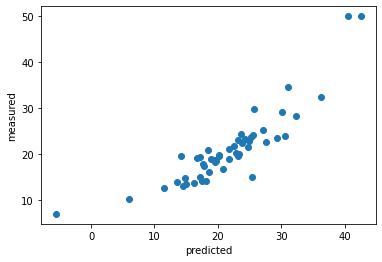

In [37]:
plt.plot(y_pred,y_test,'o')
plt.ylabel('measured')
plt.xlabel('predicted')

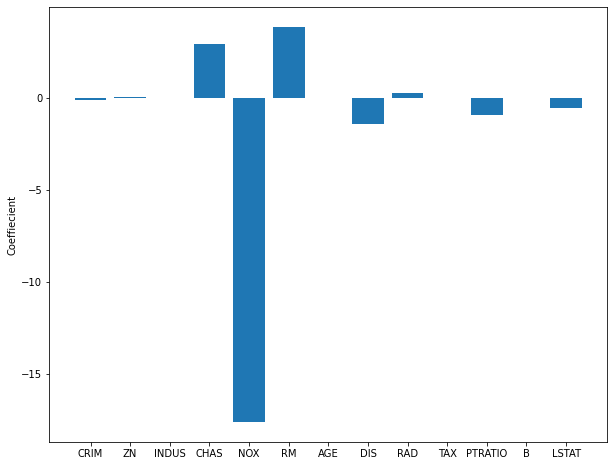

In [38]:
features = data.feature_names
coefficients = np.true_divide(reg.named_steps['SGD'].coef_,  reg.named_steps['scaler'].scale_) 
fig,ax = plt.subplots(1,1,figsize=(10,8))
plt.bar(range(len(coefficients)),coefficients)
plt.xticks(range(len(coefficients)), features)
plt.ylabel('Coeffiecient')
plt.show();

### Example

Predicting cost of insurance based on characteristics 

In [40]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Some of our independent variables are categories, not numbers so that we cannot use gradient descent directly. 

There are different ways to address this issue, they all have their advantages and disadvantages. 

#### Method 1 -> Label encoder

Label encoder gives a numeric value to each category, for example
$$
males = 0  \\
female = 1
$$

and use those as the input to the model. 


#### Method 2 -> One-hot-encoder 

One-hot-encoder creates new *dummy* numeric variables for each category, for example

The input variable

|   sex   |
| ---- |
|  male   | 
| female |
| female |
| male |
| female |

becomes 

| male    | female |
| ----- | ---- |
| 1     | 0      |
| 0  | 1       |
| 0     |1     |
| 1  | 0      |
| 0     |1     |


One-hot-encoder is often used in machine learning problems. However, sometimes you are forced to use label encoder due to the large number of categories.

In [41]:
#pandas includes a method to create one-hot-encoding variables 

#use .get_dummies to create the dummy variables
sex_dummy = pd.get_dummies(data['sex'])
smoker_dummy = pd.get_dummies(data['smoker'])
region_dummy = pd.get_dummies(data['region'])

#append the variables to the data
data = pd.concat([data,sex_dummy,smoker_dummy,
                region_dummy], axis=1)

#remove the categorical variables
data = data.drop(['sex','smoker','region'], axis=1)
data.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [44]:
#now, rename the no and yes variables to non-smoker, yes-smoker
data.rename(columns={'no': 'non-smoker',
              'yes': 'yes-smoker'}, inplace=True)
data.head()

,age,bmi,children,charges,female,male,non-smoker,yes-smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [45]:
#create the data for prediction

X = data[['age', 'bmi', 'children','female','male','non-smoker', 'yes-smoker','northeast','northwest', 'southeast','southwest',]]
y = data[['charges']].values

/Users/diegoguarinlopez/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


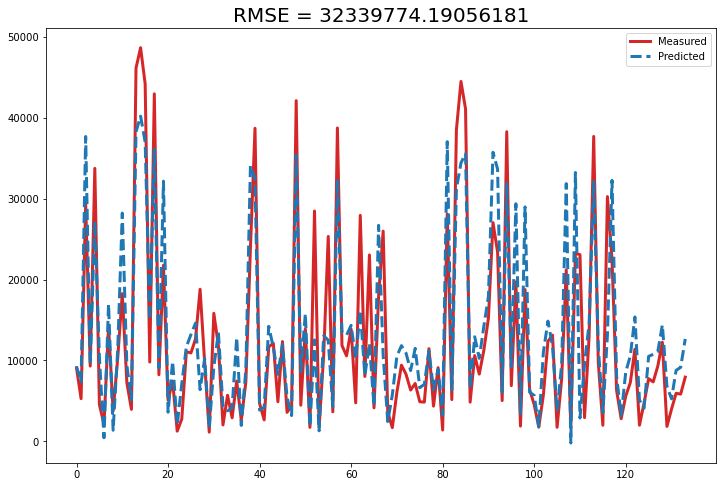

In [47]:
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=random_seed)


#create pipeline that includes scaling and gradient descent
reg = Pipeline([('scaler', StandardScaler()),
                ('SGD', SGDRegressor())])
#fit the model with data
reg.fit(X_train,y_train);

#make a prediction 
y_pred = reg.predict(X_test)

#plot the result
fig,ax = plt.subplots(1,1,figsize=(12,8))
plt.plot(y_test, label= 'Measured', lw = 3, color='tab:red');
plt.plot(y_pred, '--', label= 'Predicted', lw = 3, color = 'tab:blue')
plt.legend()
plt.title(f'RMSE = {mean_squared_error(y_pred,y_test)}', fontsize=20);
plt.show();

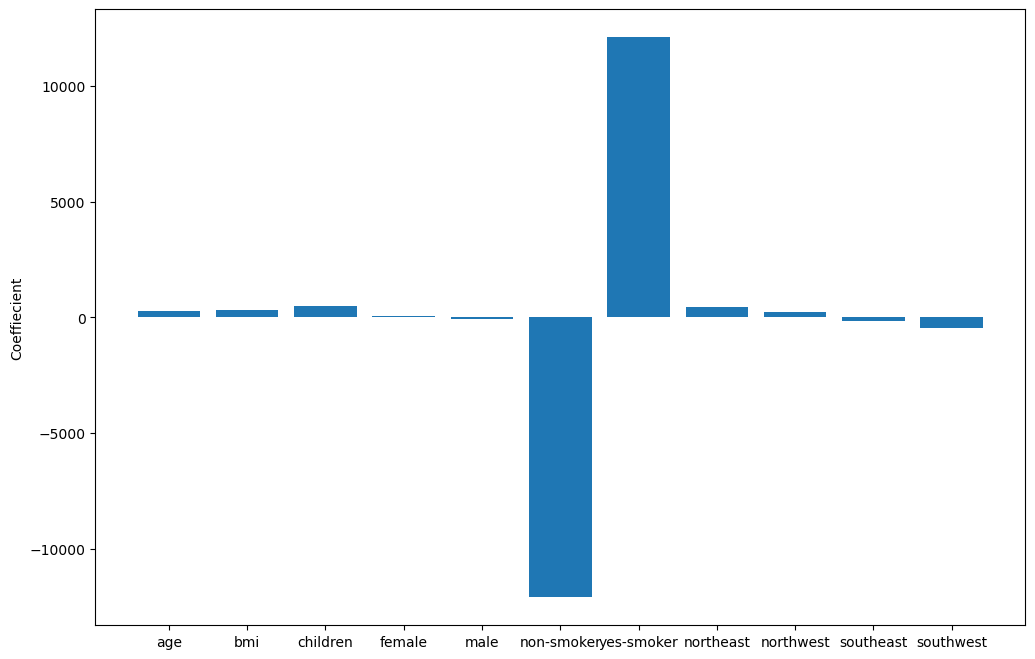

In [106]:
features = ['age', 'bmi', 'children','female','male','non-smoker', 'yes-smoker','northeast','northwest', 'southeast','southwest']
coefficients = np.true_divide(reg.named_steps['SGD'].coef_,  reg.named_steps['scaler'].scale_) 
fig,ax = plt.subplots(1,1,figsize=(12,8))
plt.bar(range(len(coefficients)),coefficients)
plt.xticks(range(len(coefficients)), features)
plt.ylabel('Coeffiecient')
plt.show();